## Mahfuz Islam Khan Jabed
mahfuzislam1410@gmail.com

www.linkedin.com/in/jabedkhanjb

www.github.com/jabedkhanjb

### Creative IT Institute
#### Courses instructed by Smritika Sadhukhan
#### ES PML 2305

# Haberman Cancer Survival Observation

In [110]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1000/1*k87EFXarEajzTbPro1xVJg.png')

#### Importing Libraries

In [47]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [45]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [46]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

#### Let's rename the Dataset column name 

In [51]:
df.rename(columns={"30": 'Age', '64':'Operation Year', '1':'Axil Nodes',\
                   '1.1':'Survival Status'}, inplace=True)

In [52]:
df.head(1)

,Age,Operation Year,Axil Nodes,Survival Status
0,30,62,3,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Operation Year   305 non-null    int64
 2   Axil Nodes       305 non-null    int64
 3   Survival Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [54]:
df.shape

(305, 4)

In [55]:
df.describe()

,Age,Operation Year,Axil Nodes,Survival Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [56]:
df.head()

,Age,Operation Year,Axil Nodes,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [57]:
df.iloc[:,-1].value_counts()

Survival Status
1    224
2     81
Name: count, dtype: int64

In [58]:
df.iloc[:,-1].unique()

array([1, 2])

#### Rename the Survival Status

In [59]:
df["Survival Status"] = df["Survival Status"].replace({1: "Yes", 2: "No"})

In [60]:
df.iloc[:,-1].unique()

array(['Yes', 'No'], dtype=object)

In [61]:
df.iloc[:, -1].value_counts()

Survival Status
Yes    224
No      81
Name: count, dtype: int64

In [62]:
print("Haberman Survival Dataset: 224 patients survived 5 years or longer (Yes), while 81 patients did not survive 5 years (No).")


Haberman Survival Dataset: 224 patients survived 5 years or longer (Yes), while 81 patients did not survive 5 years (No).


### Finding unique class name for the target feature

In [63]:
print(df.groupby("Survival Status").count())

                 Age  Operation Year  Axil Nodes
Survival Status                                 
No                81              81          81
Yes              224             224         224


In [64]:
yes =  df.loc[df['Survival Status']=='Yes']
no = df.loc[df['Survival Status']=='No']

In [65]:
yes.shape

(224, 4)

In [66]:
no.shape

(81, 4)

### Statistical Calculation for class 'yes' & 'no'

In [67]:
yes.describe()

,Age,Operation Year,Axil Nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [68]:
no.describe()

,Age,Operation Year,Axil Nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Observation:
To predict a patient's likelihood of survival beyond 5 years, we can analyze factors such as the patient's age, year of operation, and the number of positive axillary nodes.

# Visualization
### Box Plot for Analyzing Survival Status by following Age Column 

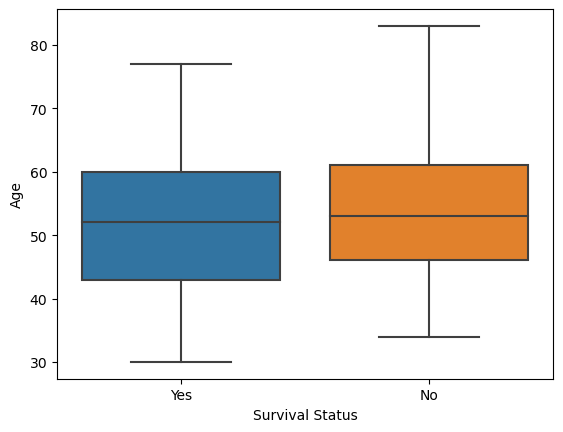

In [74]:
sns.boxplot(x='Survival Status', y='Age', data=df)
plt.show()

Observation: Ages above approximate 78 and above tend to have a higher likelihood of dying within 5 years of the operation, whereas those aged 30 and below are less likely to experience early mortality.

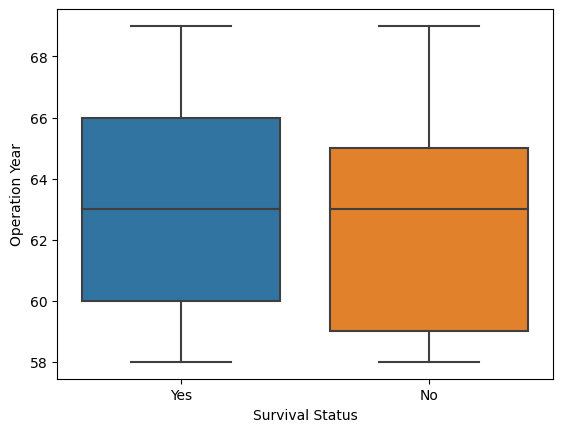

In [75]:
sns.boxplot(x='Survival Status', y='Operation Year', data=df)
plt.show()

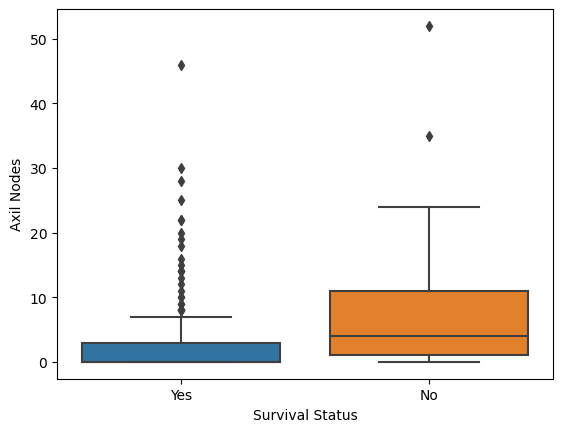

In [76]:
sns.boxplot(x='Survival Status', y='Axil Nodes', data=df)
plt.show()

# Violin Plot

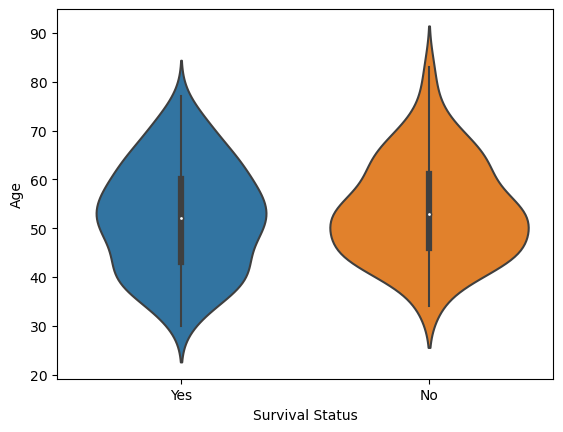

In [77]:
sns.violinplot(x='Survival Status', y='Age', data=df)
plt.show()

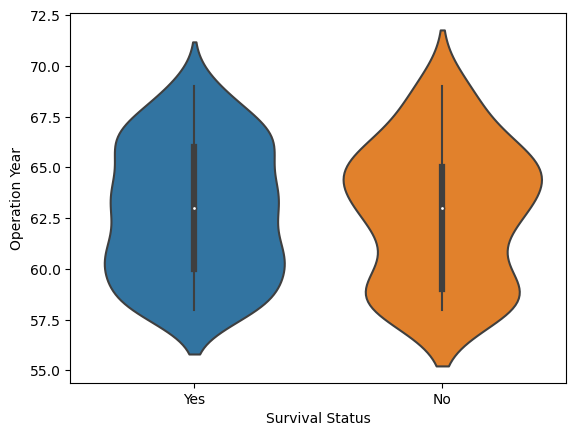

In [78]:
sns.violinplot(x='Survival Status', y='Operation Year', data=df)
plt.show()

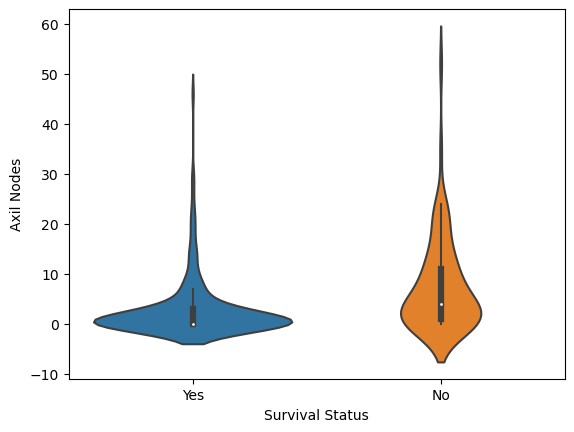

In [79]:
sns.violinplot(x='Survival Status', y='Axil Nodes', data=df)
plt.show()

# Scatter Plot

[]

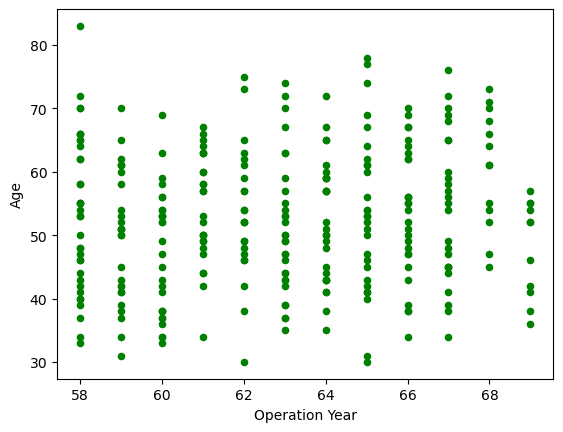

In [82]:
df.plot(kind='scatter', x='Operation Year', y='Age', color='green')
plt.plot()

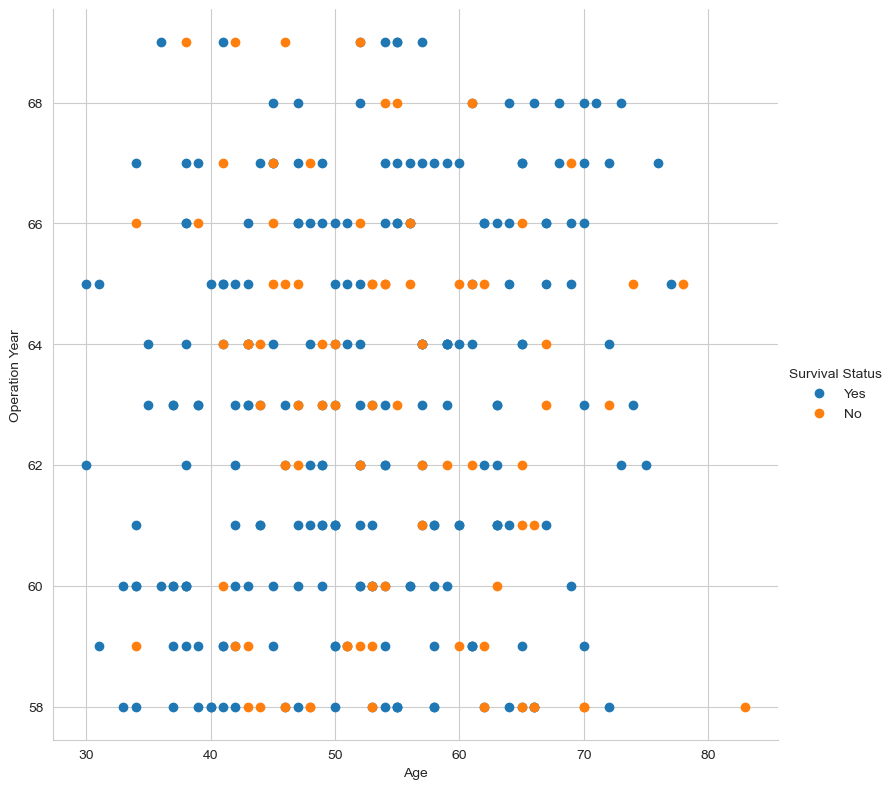

In [91]:
sns.set_style('whitegrid')

sns.FacetGrid(df, hue='Survival Status', height=8)\
             .map(plt.scatter, 'Age', 'Operation Year').add_legend()
plt.show()

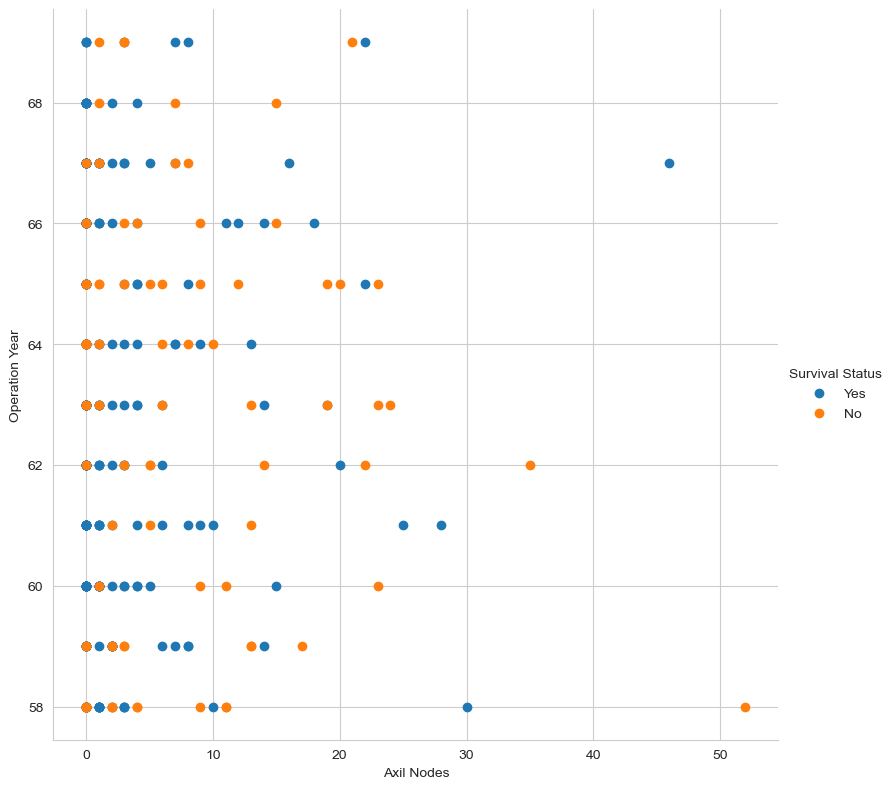

In [93]:
sns.set_style('whitegrid')

sns.FacetGrid(df, hue='Survival Status', height=8)\
             .map(plt.scatter, 'Axil Nodes', 'Operation Year').add_legend()
plt.show()

# Pair Plot

In [102]:
import warnings
warnings.filterwarnings("ignore") # Ignore all annoying warnings

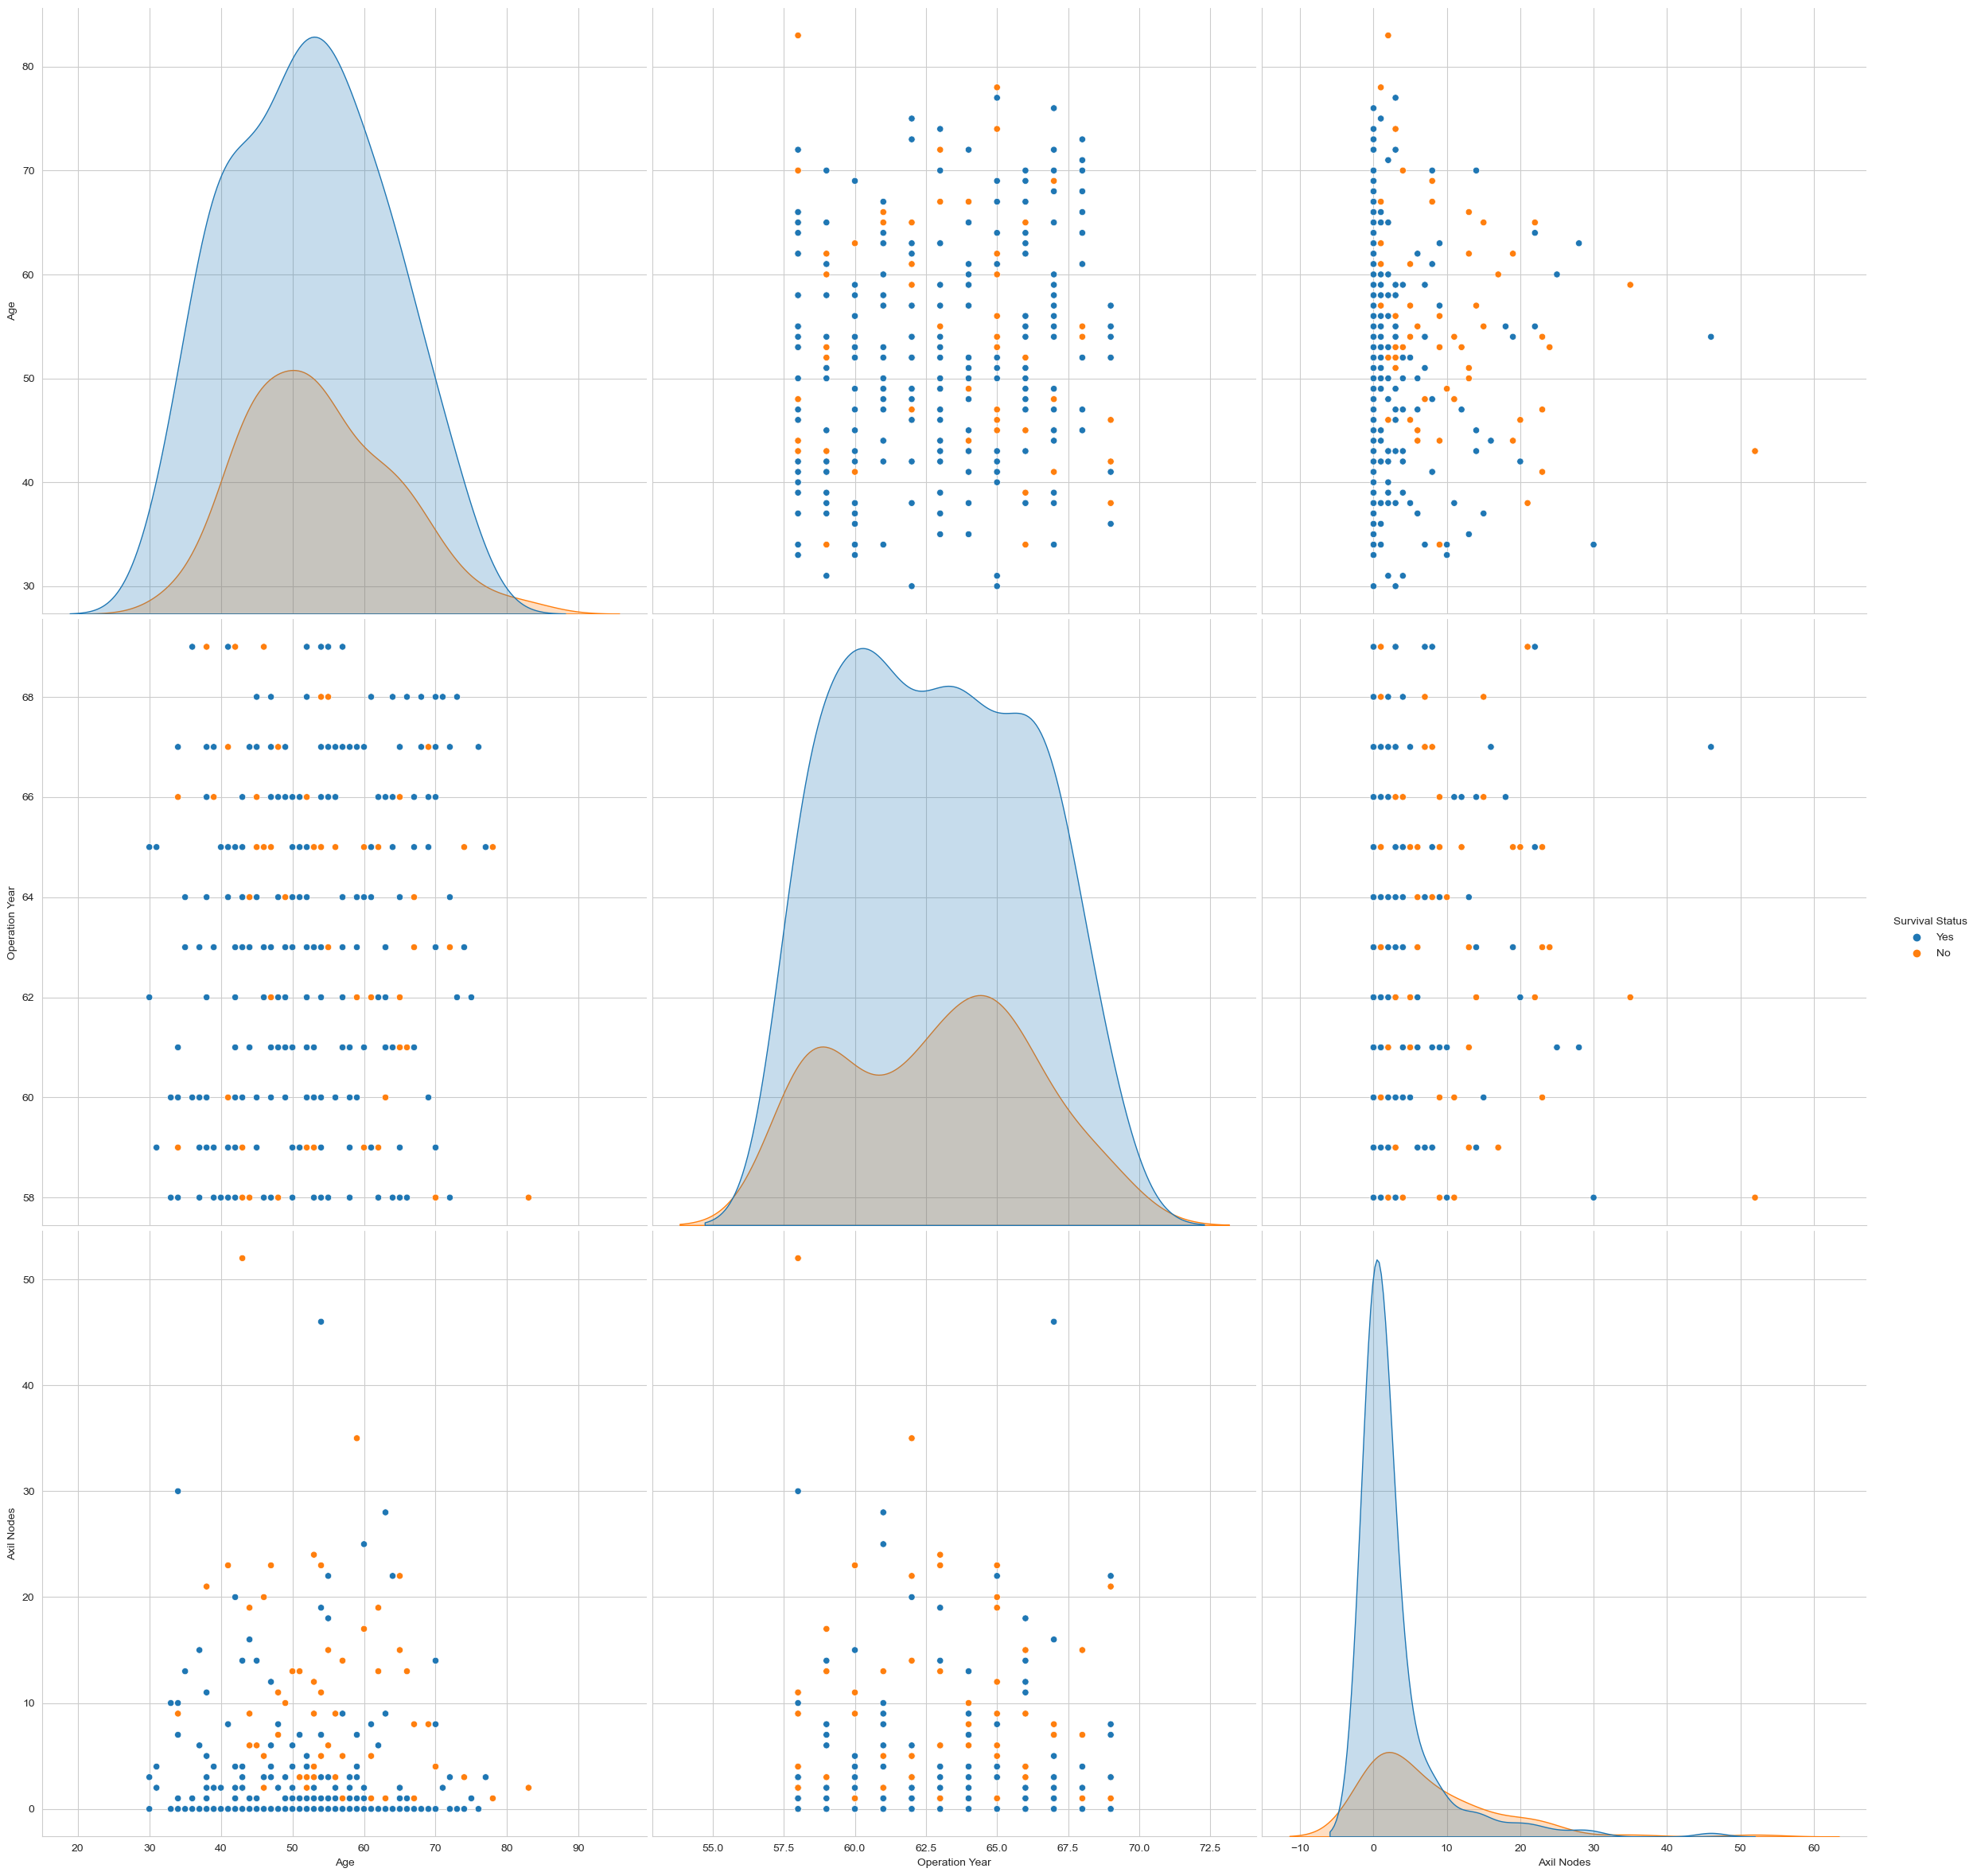

In [103]:
sns.set_style('whitegrid')

sns.pairplot(df, hue='Survival Status', height=8)
plt.show()

The visualization is not clear due to the overlapping of data points.

## Histogram Graph

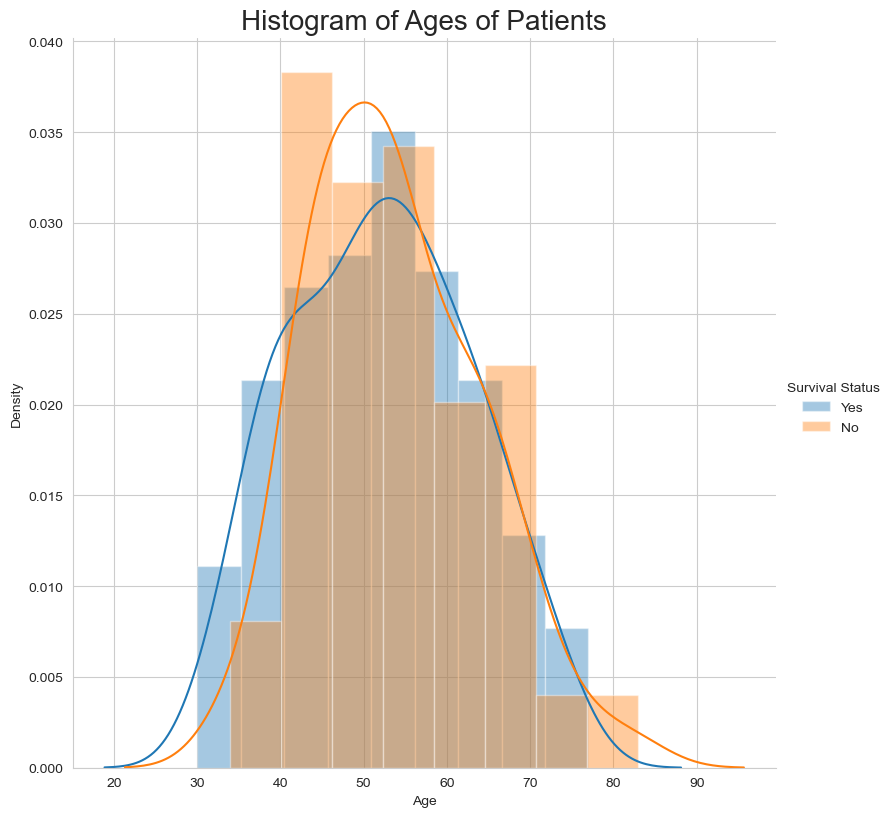

In [101]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survival Status', height=8)\
    .map(sns.distplot,'Age').add_legend()

plt.title('Histogram of Ages of Patients', fontsize=20)
plt.show()

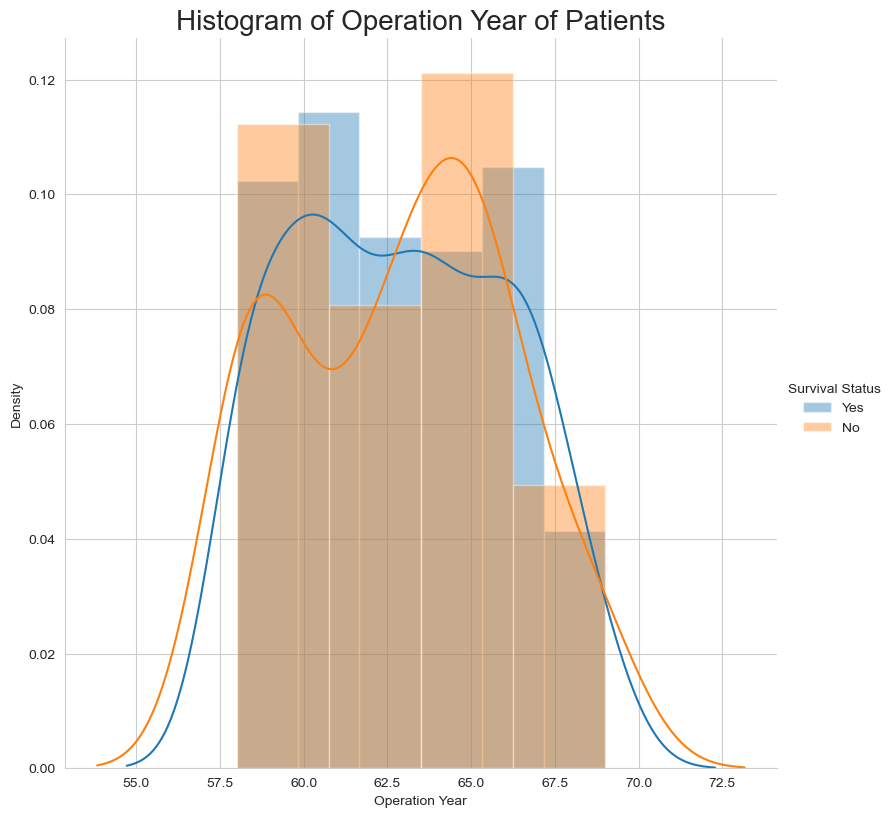

In [106]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survival Status', height=8)\
    .map(sns.distplot,'Operation Year').add_legend()

plt.title('Histogram of Operation Year of Patients', fontsize=20)
plt.show()

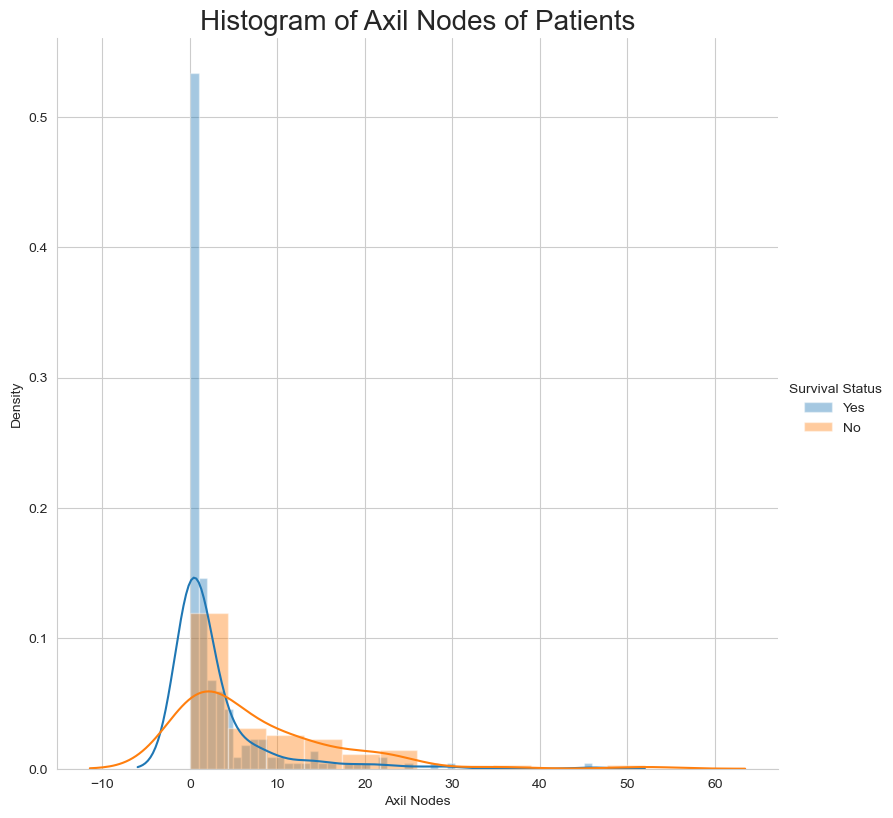

In [107]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survival Status', height=8)\
    .map(sns.distplot,'Axil Nodes').add_legend()

plt.title('Histogram of Axil Nodes of Patients', fontsize=20)
plt.show()

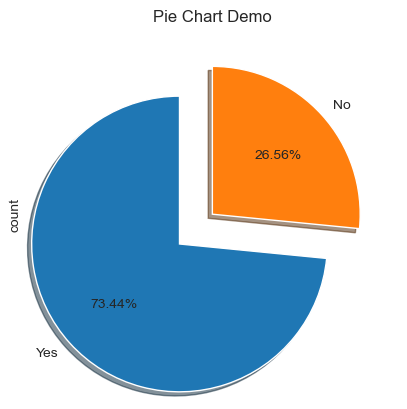

In [108]:
df['Survival Status'].value_counts().plot(kind= "pie",autopct = '%1.2f%%', shadow= True, startangle = 90, explode = (.3,0))
plt.title("Pie Chart Demo")
plt.show()

## Mahfuz Islam Khan Jabed
mahfuzislam1410@gmail.com

www.linkedin.com/in/jabedkhanjb

www.github.com/jabedkhanjb

### Creative IT Institute
#### Courses instructed by Smritika Sadhukhan
#### ES PML 2305